In [24]:
import numpy as np
import pyccl as ccl
import pylab as plt

In [44]:
parameters1 = {'Omega_c': 0.27, 'Omega_b': 0.045, 'h': 0.67, 'sigma8': 0.83, 'n_s': 0.96, 'bias': 1.5, 'mu_0': 0, 'sigma_0': 0 }
parameters2 = {'Omega_c': 0.27, 'Omega_b': 0.045, 'h': 0.67, 'sigma8': 0.83, 'n_s': 0.96, 'bias': 1.5, 'mu_0': 1, 'sigma_0': 1}
parameters3 = {'Omega_c': 0.27, 'Omega_b': 0.045, 'h': 0.67, 'sigma8': 0.83, 'n_s': 0.96, 'bias': 1.5, 'mu_0': -1, 'sigma_0': -1} 

In [45]:
def data_vector(params):
    cosmo = ccl.Cosmology(Omega_c = params['Omega_c'],\
                          Omega_b = params['Omega_b'],\
                          h = params['h'],\
                          sigma8 = params['sigma8'],\
                          n_s = params['n_s'],\
                          mu_0 = params['mu_0'],\
                          sigma_0 = params['sigma_0'],\
                          matter_power_spectrum = 'linear')
    
    #Load in lensing and clustering distributions and ell
    dNdz_lens = np.loadtxt('dNdz_srcs_LSSTSRD_Y1.dat') 
    dNdz_clust = np.loadtxt('dNdz_clust_LSSTSRD_Y1.dat')
    ell = np.loadtxt('ell-values')
    
    #Construct tracer objects
    tracers_clust = []
    tracers_lens = []
    
    for i in range(5):
        tracers_clust.append(ccl.NumberCountsTracer(cosmo,\
                                                    has_rsd=False,\
                                                    dndz=(dNdz_clust[:,0],\
                                                    dNdz_clust[:,i+1]),\
                                                    bias=(dNdz_clust[:,0], params['bias']*np.ones(2000))))
    
        tracers_lens.append(ccl.WeakLensingTracer(cosmo, dndz=(dNdz_lens[:,0], dNdz_lens[:,i+1])))
    
    #Now that the tracers are constructed, calculate C_l's for shear, gg-lensing and lensing
    cls_clus = []
    cls_gg = []
    cls_gg_clean = []
    gglensing = [0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
    cls_lens = []
    

    for i in range(len(tracers_clust)):
        
        cls_clus.append(ccl.angular_cl(cosmo, tracers_clust[i], tracers_clust[i], ell))
        
        for j in range(len(tracers_clust)):
            
            cls_gg.append(ccl.angular_cl(cosmo, tracers_clust[i], tracers_lens[j], ell))
            
            if i >= j:
                cls_lens.append(ccl.angular_cl(cosmo,tracers_lens[i], tracers_lens[j], ell))
                
    for n in range(len(gglensing)):
        if gglensing[n] == 1:
            cls_gg_clean.append(cls_gg[n])

    #Clean up the data vectors shapes and combine them all
    cls_clus_gg = np.append(cls_clus, cls_gg_clean)
    cls_combined = np.append(cls_clus_gg, cls_lens)
    
    return cls_combined

In [49]:
parameters = []
parameters.append(parameters1)
parameters.append(parameters2)
parameters.append(parameters3)
print(parameters)

[{'Omega_c': 0.27, 'Omega_b': 0.045, 'h': 0.67, 'sigma8': 0.83, 'n_s': 0.96, 'bias': 1.5, 'mu_0': 0, 'sigma_0': 0}, {'Omega_c': 0.27, 'Omega_b': 0.045, 'h': 0.67, 'sigma8': 0.83, 'n_s': 0.96, 'bias': 1.5, 'mu_0': 1, 'sigma_0': 1}, {'Omega_c': 0.27, 'Omega_b': 0.045, 'h': 0.67, 'sigma8': 0.83, 'n_s': 0.96, 'bias': 1.5, 'mu_0': -1, 'sigma_0': -1}]


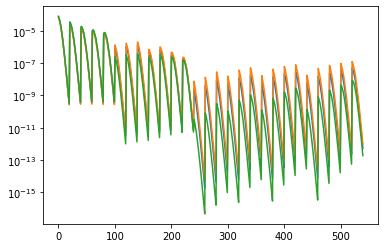

In [50]:
cls = []

for k in range(3):
    cls.append(data_vector(parameters[k]))
    plt.plot(cls[k])
    
plt.yscale('log')
plt.show()

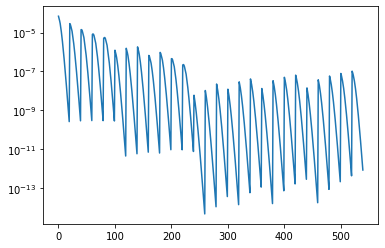

In [41]:
plt.plot(cls_2)
plt.yscale('log')
plt.show()

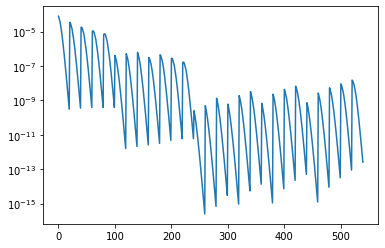

In [42]:
plt.plot(cls_3)
plt.yscale('log')
plt.show()